In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [416]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [417]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [418]:
data.shape

(13318, 9)

In [419]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [420]:
data = data.drop("society", axis='columns')

In [421]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [422]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [423]:
def extract_numeric(value):
    if pd.isna(value):
        return np.nan
    else:
        return int(value.split(' ')[0])

# Applying the function to the 'size' column
data['BHK'] = data['size'].apply(extract_numeric)

In [424]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [425]:
data = data.drop("size", axis='columns')

In [426]:
data['total_sqft'].head(100)

0     1056
1     2600
2     1440
3     1521
4     1200
      ... 
95    1540
96    2894
97    1330
98    1200
99    1200
Name: total_sqft, Length: 100, dtype: object

In [427]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [428]:
def clean_value(value):
    x = value.split('-')
    if len(x) == 2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(value)
    except:
        return None

In [429]:
data['Total_sqft'] = data['total_sqft'].apply(clean_value)

In [430]:
data.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0


In [431]:
data['Total_sqft'].head(20)

0     1056.0
1     2600.0
2     1440.0
3     1521.0
4     1200.0
5     1170.0
6     2732.0
7     3300.0
8     1310.0
9     1020.0
10    1800.0
11    2785.0
12    1000.0
13    1100.0
14    2250.0
15    1175.0
16    1180.0
17    1540.0
18    2770.0
19    1100.0
Name: Total_sqft, dtype: float64

In [432]:
data.iloc[1821,3]

'1574Sq. Yards'

In [433]:
data.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0


In [434]:
len(data['location'].unique())

1306

In [435]:
data['Prize_per_sqft'] = data['price']*100000/data['Total_sqft']

In [436]:
data.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [437]:
data.location.isnull().sum()

1

In [438]:
data = data.dropna(subset=['location'])

In [439]:
data.location.isnull().sum()

0

In [440]:
data.location = data.location.apply(lambda x: x.strip())
x = data.groupby('location')['location'].agg('count').sort_values(ascending = False)
x

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [441]:
location_state_less_than_10 = x[x<=10]

In [442]:
data.location = data.location.apply(lambda x: 'others' if x in location_state_less_than_10 else x)

In [443]:
len(data.location.unique())

242

In [444]:
data.head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170,2.0,1.0,38.00,2.0,1170.0,3247.863248
6,Super built-up Area,18-May,Old Airport Road,2732,4.0,NaN,204.00,4.0,2732.0,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300,4.0,NaN,600.00,4.0,3300.0,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,1310,3.0,1.0,63.25,3.0,1310.0,4828.244275
9,Plot Area,Ready To Move,others,1020,6.0,NaN,370.00,6.0,1020.0,36274.509804


In [445]:
data.shape

(13317, 10)

In [446]:
data = data.dropna(subset=['area_type'])
data = data.dropna(subset=['availability'])

In [447]:
data.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [448]:
data.shape

(13317, 10)

In [449]:
data[data.Total_sqft/data.BHK<300].head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
9,Plot Area,Ready To Move,others,1020,6.0,NaN,370.0,6.0,1020.0,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600,9.0,NaN,200.0,8.0,600.0,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407,4.0,1.0,150.0,6.0,1407.0,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350,7.0,0.0,85.0,8.0,1350.0,6296.296296
70,Plot Area,Ready To Move,others,500,3.0,2.0,100.0,3.0,500.0,20000.000000


In [450]:
data_1 = data[~(data.Total_sqft/data.BHK<300)]

In [451]:
data_1.shape

(12573, 10)

In [452]:
data_1.Prize_per_sqft.describe()

count     12527.000000
mean       6304.154042
std        4162.678834
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Prize_per_sqft, dtype: float64

In [453]:
def Remove_Prize_Outliers(data):
    data_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        me = np.mean(subdf.Prize_per_sqft)
        st = np.std(subdf.Prize_per_sqft)
        reduced_data = subdf[(subdf.Prize_per_sqft> (me-st)) & (subdf.Prize_per_sqft< (me+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index = True)
    return data_out

In [454]:
data_2 = Remove_Prize_Outliers(data_1)

In [455]:
data_2.shape

(10301, 10)

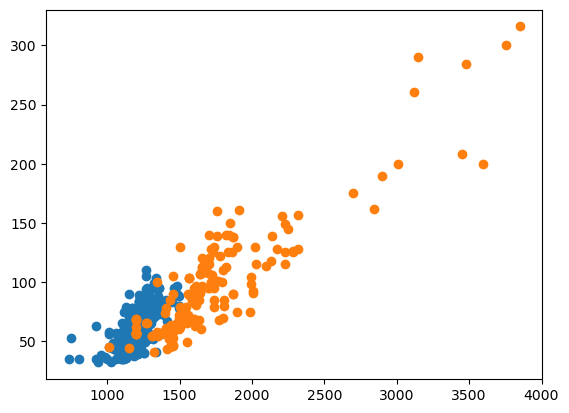

In [456]:
def plot_scatter(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    plt.scatter(bhk2.Total_sqft,bhk2.price)
    plt.scatter(bhk3.Total_sqft,bhk3.price)
    
plot_scatter(data_2,'Whitefield')

In [457]:
def Remove_bhk_outliers(df):
    ex_in = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_st = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_st[bhk] = {
                'mean' : np.mean(bhk_df.Prize_per_sqft),
                'std' : np.std(bhk_df.Prize_per_sqft),
                'count' :bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_st.get(bhk-1)
            if stats and stats['count']>5:
                ex_in = np.append(ex_in,bhk_df[bhk_df.Prize_per_sqft<(stats['mean'])].index.values)
    return df.drop(ex_in,axis = 'index')
    

In [458]:
data_3 = Remove_bhk_outliers(data_2)

In [459]:
data_3.shape

(7367, 10)

(array([ 550., 3608., 2312.,  461.,  255.,  116.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

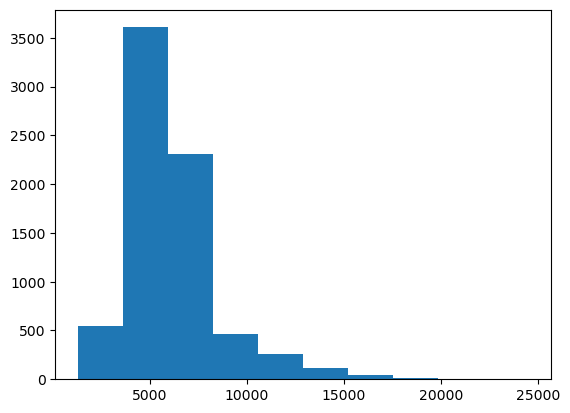

In [460]:
plt.hist(data_3.Prize_per_sqft)

In [461]:
data_3.bath.isna().sum()

37

In [462]:
data_3 = data_3.dropna(subset=['bath'])

In [463]:
data_3.shape

(7330, 10)

In [464]:
data_3[data_3.bath>10]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
5315,Super built-up Area,Ready To Move,Neeladri Nagar,4000,12.0,NaN,160.0,10.0,4000.0,4000.000000
8544,Super built-up Area,Ready To Move,others,12000,12.0,NaN,525.0,10.0,12000.0,4375.000000
8633,Super built-up Area,Ready To Move,others,10000,16.0,NaN,550.0,16.0,10000.0,5500.000000
9366,Super built-up Area,Ready To Move,others,6000,12.0,NaN,150.0,11.0,6000.0,2500.000000
9697,Super built-up Area,Ready To Move,others,5425,13.0,0.0,275.0,13.0,5425.0,5069.124424


In [465]:
data_4 = data_3[data_3.bath<data_3.BHK+2]

In [466]:
data_4.shape

(7251, 10)

In [467]:
data_4.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Total_sqft,Prize_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4.0,1.0,428.0,4.0,2850.0,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3.0,2.0,194.0,3.0,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2.0,3.0,235.0,3.0,1875.0,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2.0,0.0,130.0,3.0,1200.0,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2.0,2.0,148.0,2.0,1235.0,11983.805668


In [468]:
data_4 = data_4.drop(['area_type','availability','Prize_per_sqft','balcony','total_sqft'],axis = 'columns')

In [469]:
data_4.duplicated().sum()

620

In [470]:
data_4 = data_4.drop_duplicates()

In [471]:
data_4.shape

(6631, 5)

In [472]:
dummy = pd.get_dummies(data_4.location)
dummy.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [473]:
Fdata = pd.concat([data_4,dummy.drop('others',axis='columns')],axis='columns')
Fdata.head()

,location,bath,price,BHK,Total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4.0,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3.0,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3.0,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3.0,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2.0,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [474]:
df12 = Fdata.drop('location',axis='columns')
df12.head(2)

,bath,price,BHK,Total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4.0,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3.0,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [475]:
columns = ['Total_sqft'] + [col for col in df12.columns if col != 'Total_sqft']
df12 = df12.reindex(columns=columns)

In [476]:
df12.head(5)

,Total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [477]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,Total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [478]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [479]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [480]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8541139889415285

In [481]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80203817, 0.79977201, 0.88996607, 0.84931587, 0.84518657])

In [482]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\saichaitanya.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\saichaitanya.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

,model,best_score,best_params
0,linear_regression,0.837256,{'normalize': False}
1,lasso,0.713261,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.736780,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [483]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [484]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\saichaitanya.kumar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.72392542068448

In [485]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\saichaitanya.kumar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.77976040581619

In [486]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\saichaitanya.kumar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.2529400175929

In [487]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [488]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))